# Problem Statement: 1
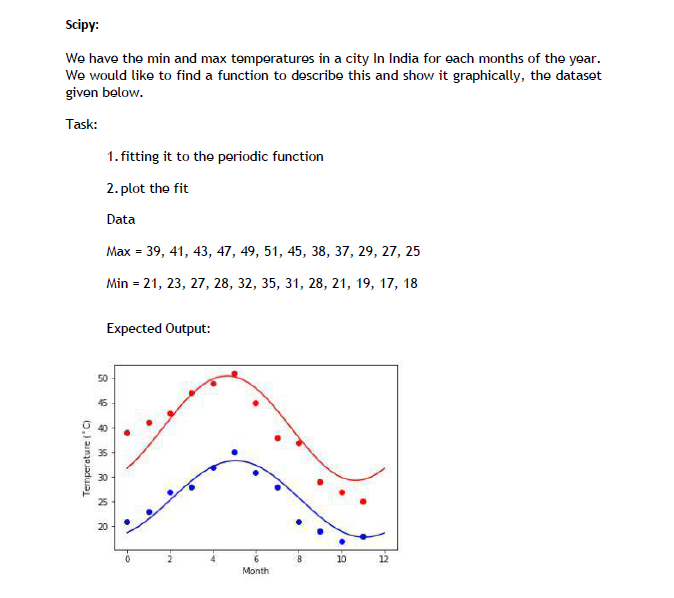

In [1]:
# Import the lib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the data
max_temp = [39,41,43,47,49,51,45,38,37,29,27,25]
min_temp = [21,23,27,28,32,35,31,28,21,19,17,18]
months = np.arange(0,12)
print(months)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


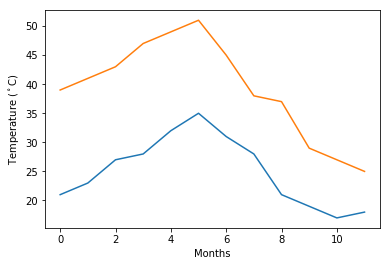

In [3]:
# Normal plot
plt.plot(months,min_temp)
plt.plot(months,max_temp)
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)');

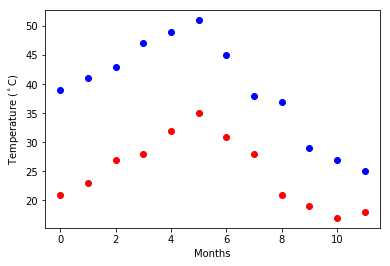

In [4]:
# Normal plot with dotted style
plt.plot(months,min_temp,'ro')
plt.plot(months,max_temp,'bo')
plt.xlabel('Months')
plt.ylabel('Temperature ($^\circ$C)');

In [5]:
# Fitting it to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temp, [-40, 20, 0])

In [6]:
# Genrate 365 data within 0 to 12
days = np.linspace(0, 12, num=365)

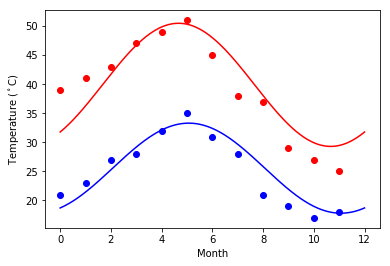

In [7]:
plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

# Problem Statement : 2
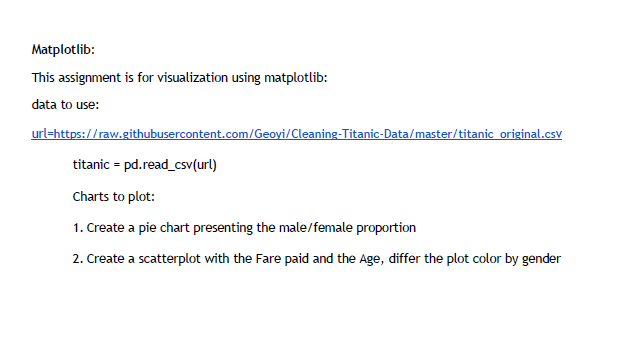

In [8]:
## Import the lib
import pandas as pd

In [9]:
#Read the data
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


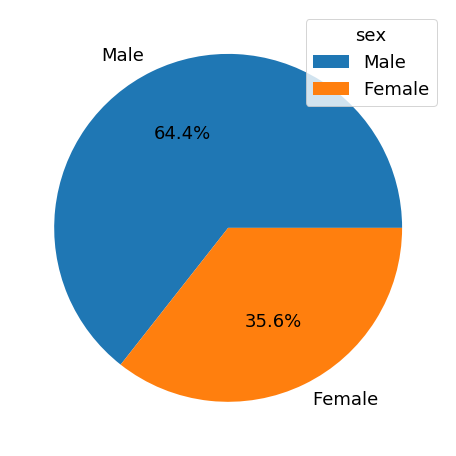

In [10]:
# define the plot size
plt.figure(figsize=(15,8))
# Define the font size
plt.rcParams['font.size'] = 18
# Define own label
mylabels = ['Male','Female']
# Plot with unique values,autopct will calculate the %
plt.pie(titanic['sex'].value_counts(),labels=mylabels,autopct='%1.1f%%');
plt.legend(title = "sex")
plt.show()

In [11]:
# Check the null value
titanic.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [12]:
# fille the null value
titanic['sex'].fillna(titanic['sex'].mode()[0], inplace=True)

In [13]:
# Ensure that there is no missing value
titanic['sex'].isna().sum()

0

In [14]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
titanic['sex']= le.fit_transform(titanic['sex'])
#titanic['sex']

In [16]:
# importing the style package 
from matplotlib import style 
# using the style for the plot 
plt.style.use('ggplot')

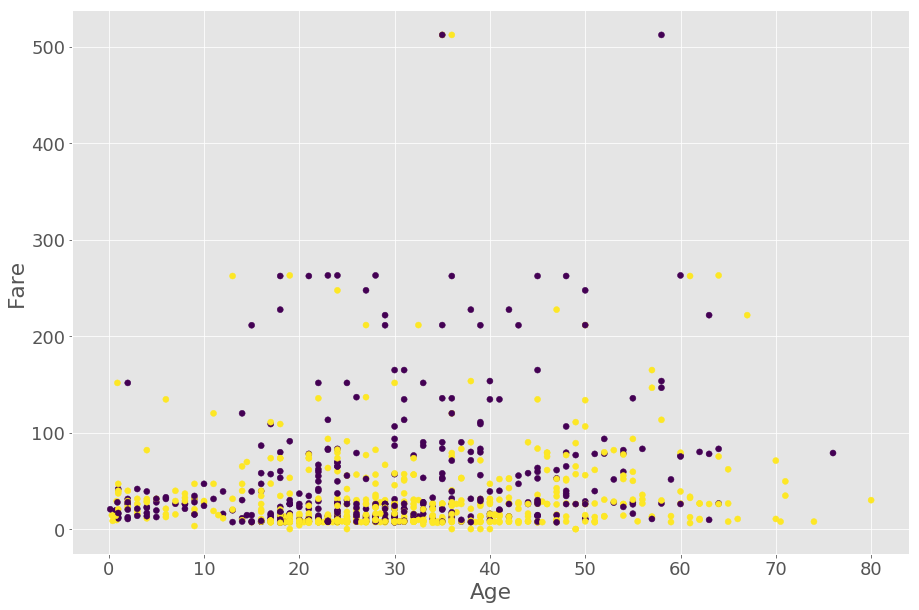

In [17]:
#plot using matplot
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 18
plt.scatter(titanic['age'],titanic['fare'],c=titanic['sex']);
plt.xlabel('Age');
plt.ylabel('Fare');
plt.show()

In [18]:
# Method 2 : using seaborn

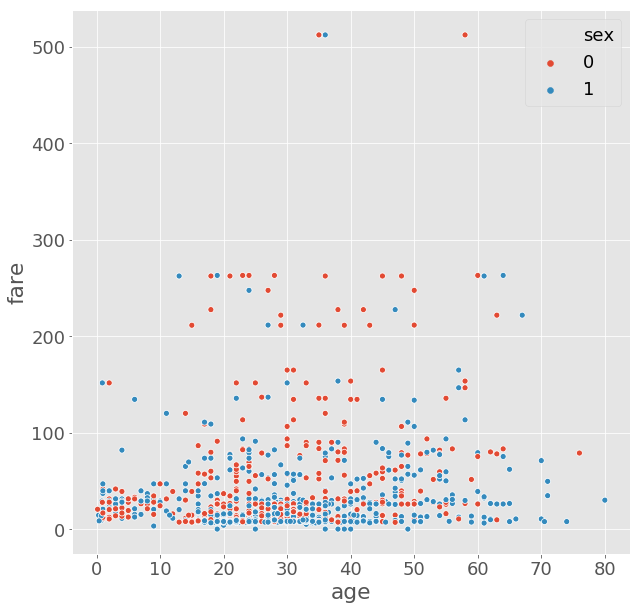

In [19]:
# scatter plot hue parameter
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.scatterplot(x = titanic['age'], y = titanic['fare'], hue = titanic['sex'])